In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df_thread_3 = pd.read_csv('bubble_thread1000x1000x3.txt', sep=';', header=None)
df_thread_6 = pd.read_csv('bubble_thread1000x1000x6.txt', sep=';', header=None)
df_thread_12 = pd.read_csv('bubble_thread1000x1000x12.txt', sep=';', header=None)
df_bubble = pd.read_csv('bubble1000x1000.txt', sep=';', header=None)


In [27]:
df_thread_3.columns = ["num_arrays", "time", "size", "threads"]
df_thread_6.columns = ["num_arrays", "time", "size", "threads"]
df_thread_12.columns = ["num_arrays", "time", "size", "threads"]
df_bubble.columns = ["num_arrays", "time", "size"]

In [28]:
df = pd.DataFrame({"num_arrays": df_thread_6["num_arrays"], '3_threads': df_thread_3['time'], '6_threads': df_thread_6["time"], '12_threads': df_thread_12["time"], "bubble": df_bubble["time"]})

# df_speedup = pd.DataFrame({"num_arrays": df_thread_6["num_arrays"], "speedup_6":  "speedup_6": df_bubble["time"]/df_thread_6["time"], "speedup_12": df_bubble["time"]/df_thread_12["time"]})
df_speedup = pd.DataFrame({"num_arrays": df_thread_6["num_arrays"], "speedup_3": df_bubble["time"]/df_thread_3["time"], "speedup_6": df_bubble["time"]/df_thread_6["time"], "speedup_12": df_bubble["time"]/df_thread_12["time"]})
# df_eficiencia = pd.DataFrame({"num_arrays": df_thread_6["num_arrays"], "eficiencia_6": df_speedup["speedup_6"]/6, "eficiencia_12": df_speedup["speedup_12"]/12})
df_eficiencia = pd.DataFrame({"num_arrays": df_thread_6["num_arrays"], "eficiencia_3": df_speedup["speedup_3"]/3, "eficiencia_6": df_speedup["speedup_6"]/6, "eficiencia_12": df_speedup["speedup_12"]/12})
df_speedup.head()

,num_arrays,speedup_3,speedup_6,speedup_12
0,1,0.791756,0.851468,0.638877
1,2,0.887864,0.920160,0.700540
2,3,2.962221,1.057850,0.974209
3,4,1.999088,1.044632,0.841802
4,5,1.805711,1.087883,1.029249


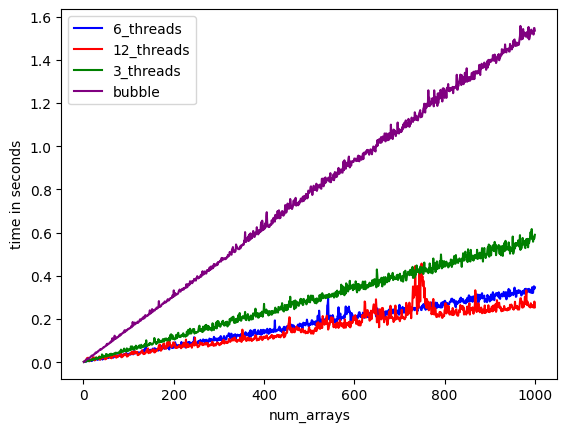

In [40]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='num_arrays', y='6_threads', color="blue", ax=ax)
df.plot(kind='line',x='num_arrays', xlabel=f"number of arrays, fixed size of {df_thread_6['size'][0]}", y='12_threads', ylabel="time in seconds", color="red", ax=ax)
df.plot(kind='line',x='num_arrays', y='3_threads', color="green", ax=ax)
df.plot(kind='line',x='num_arrays', y='bubble', color="purple", ax=ax)

plt.show()

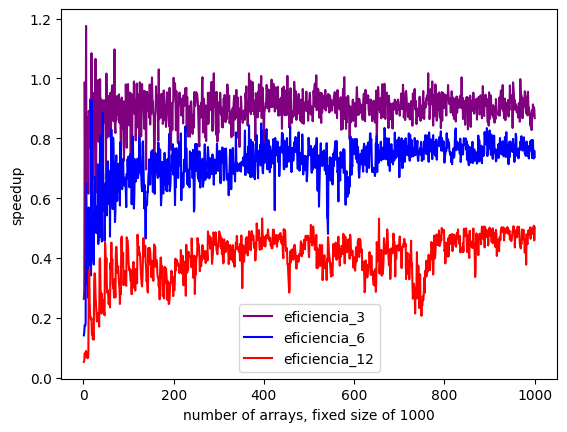

In [29]:
speedup_ax = plt.gca()

df_eficiencia.plot(kind='line',x='num_arrays', y='eficiencia_3', color="purple", ax=speedup_ax)
df_eficiencia.plot(kind='line',x='num_arrays', y='eficiencia_6', color="blue", ax=speedup_ax)
df_eficiencia.plot(kind='line',x='num_arrays', xlabel=f"number of arrays, fixed size of {df_thread_6['size'][0]}", y='eficiencia_12', ylabel="speedup", color="red", ax=speedup_ax)

plt.show()

<Axes: xlabel='threads', ylabel='eficiencia'>

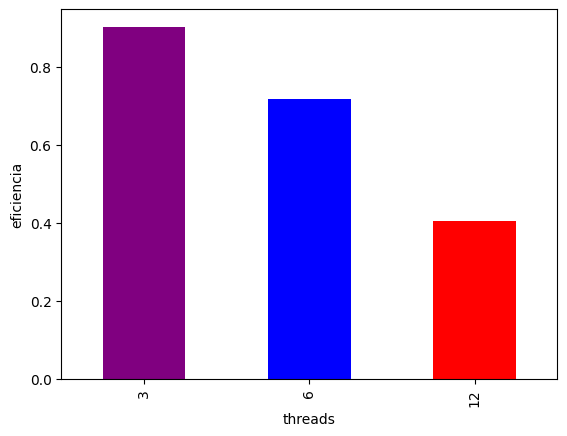

In [46]:
# remove num_arrays column
# df_eficiencia = df_eficiencia.drop(columns=["num_arrays"])
# rename columns
df_eficiencia = df_eficiencia.rename(columns={"eficiencia_3": "3", "eficiencia_6": "6", "eficiencia_12": "12"})

df_eficiencia.mean().plot(kind='bar', color=["purple", "blue", "red"], x=["3 threads", "6 threads", "12 threads"], y=["eficiencia_3", "eficiencia_6", "eficiencia_12"], ylabel="eficiencia", xlabel="threads")

In [44]:
df_eficiencia.mean()

3     0.902285
6     0.718969
12    0.404932
dtype: float64